In [1]:
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import cv2

# 데이터 로드 함수
def load_images(image_dir, target_size=(64, 64)):
    images = []
    file_names = sorted(os.listdir(image_dir))  # 정렬하여 파일 순서를 맞춤
    for file_name in file_names:
        if file_name.endswith(".png"):
            img = cv2.imread(os.path.join(image_dir, file_name), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, target_size)  # 크기 조정
            images.append(img)
    return np.array(images)

input_path = "/Users/kimeunsur/2024winter/4주차/font_images/nanumgothic"
target_path = "/Users/kimeunsur/2024winter/4주차/font_images/font_dataset"
import os

# 파일 경로 확인
print("Input path exists:", os.path.exists(input_path))
print("Target path exists:", os.path.exists(target_path))

# 파일 목록 확인
print("Files in input path:", os.listdir(input_path))
print("Files in target path:", os.listdir(target_path))
# 입력(고딕체) 데이터와 타겟 데이터 로드
X_gothic = load_images(input_path)  # 고딕체 이미지
Y_target = load_images(target_path)  # 타겟 스타일 이미지

# 데이터 정규화 (픽셀 값을 [0, 1]로 스케일링)
X_gothic = np.clip(X_gothic / 255.0, 0, 1)
Y_target = np.clip(Y_target / 255.0, 0, 1)

if X_gothic.ndim == 3:
    X_gothic = np.expand_dims(X_gothic, axis=-1)
if Y_target.ndim == 3:
    Y_target = np.expand_dims(Y_target, axis=-1)
    
# 차원 추가 (64x64 -> 64x64x1)
X_gothic = np.expand_dims(X_gothic, axis=-1)
Y_target = np.expand_dims(Y_target, axis=-1)

Input path exists: True
Target path exists: True
Files in input path: ['찀.png', '쯑.png', '뽇.png', '쒻.png', '뽪.png', '쓾.png', '뼧.png', '뾂.png', '쿔.png', '쿥.png', '찘.png', '깸.png', '펽.png', '펄.png', '먛.png', '꺐.png', '꾭.png', '딩.png', '뫷.png', '뺶.png', '뫗.png', '캁.png', '뜮.png', '푙.png', '뛻.png', '꿝.png', '꾄.png', '쁈.png', '킖.png', '쎽.png', '뗙.png', '댎.png', '떰.png', '떁.png', '꽤.png', '눼.png', '퓂.png', '끳.png', '짫.png', '뮹.png', '챼.png', '뗽.png', '됺.png', '끾.png', '쨋.png', '둷.png', '퓏.png', '퓲.png', '쪠.png', '똝.png', '똴.png', '욠.png', '췏.png', '녒.png', '츒.png', '햋.png', '왙.png', '훲.png', '졇.png', '귯.png', '앵.png', '뢸.png', '횚.png', '귢.png', '귺.png', '틾.png', '얍.png', '쵐.png', '춑.png', '쇮.png', '쇃.png', '쥼.png', '촉.png', '걼.png', '촀.png', '겍.png', '벟.png', '탠.png', '촠.png', '첽.png', '첍.png', '툄.png', '퉍.png', '붋.png', '릲.png', '샷.png', '뵦.png', '곑.png', '샸.png', '늓.png', '뵍.png', '퉎.png', '뵼.png', '퉃.png', '늆.png', '퉛.png', '삸.png', '밹.png', '반.png', '걣.png', '겎.png', '쥋.png', '숭.png', '쇭

In [3]:
from tensorflow.keras import layers  
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model 

# 스타일 정보 생성
num_samples = len(X_gothic)  # 데이터 샘플 수
num_styles = 5  # 예: 5개의 스타일
style_labels = np.random.randint(0, num_styles, size=(num_samples,))  # 랜덤 스타일 레이블
style_one_hot = to_categorical(style_labels, num_classes=num_styles)  # 원-핫 인코딩

# 모델 정의
input_img = layers.Input(shape=(64, 64, 1))  # 이미지 입력
style_input = layers.Input(shape=(num_styles,))  # 스타일 정보 입력

input_img = layers.Input(shape=(64, 64, 1))  # 이미지 입력


# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x) #이미지 크기 절반으로 64->32
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
encoded = layers.MaxPooling2D((2, 2))(x) #크기 32->16

# Decoder
x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(encoded)
x = layers.BatchNormalization()(x)
x = layers.UpSampling2D((2, 2))(x) #16->32

x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.UpSampling2D((2, 2))(x) #32->64
decoded = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

2025-01-19 21:34:25.322920: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2025-01-19 21:34:25.322952: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2025-01-19 21:34:25.322956: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2025-01-19 21:34:25.322974: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-01-19 21:34:25.322986: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
# 단일 스타일 학습용 모델 생성
simple_model = Model(input_img, decoded)

# 모델 컴파일
simple_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_val = train_test_split(X_handwritten, test_size=0.2, random_state=42)


Epoch 1/50


/Users/kimeunsur/yes/envs/newenv/lib/python3.11/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_46', 'keras_tensor_47']. Received: the structure of inputs=('*', '*')
  warnings.warn(


75/75 ━━━━━━━━━━━━━━━━━━━━ 33s 406ms/step - accuracy: 0.7329 - loss: 0.1970 - val_accuracy: 0.8621 - val_loss: 0.1111 - learning_rate: 0.0010
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 399ms/step - accuracy: 0.8492 - loss: 0.1001 - val_accuracy: 0.1275 - val_loss: 0.8291 - learning_rate: 0.0010
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 400ms/step - accuracy: 0.8563 - loss: 0.0912 - val_accuracy: 0.8607 - val_loss: 0.1132 - learning_rate: 0.0010
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 401ms/step - accuracy: 0.8540 - loss: 0.0950 - val_accuracy: 0.8580 - val_loss: 0.1136 - learning_rate: 0.0010
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 400ms/step - accuracy: 0.8574 - loss: 0.0897 - val_accuracy: 0.4327 - val_loss: 0.5058 - learning_rate: 0.0010
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.8606 - loss: 0.0870
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 399ms/step - accuracy: 0.8606 - loss: 0.0870 - val_ac

In [ ]:

# 모델 학습
history = model.fit(
    [X_gothic, style_one_hot],  # 입력: 고딕체 이미지와 스타일 정보
    Y_target,                   # 출력: 타겟 폰트 이미지
    validation_split=0.2,       # 검증 데이터 비율
    epochs=50,                  # 학습 반복 횟수
    batch_size=32,              # 배치 크기
    callbacks=callbacks
)

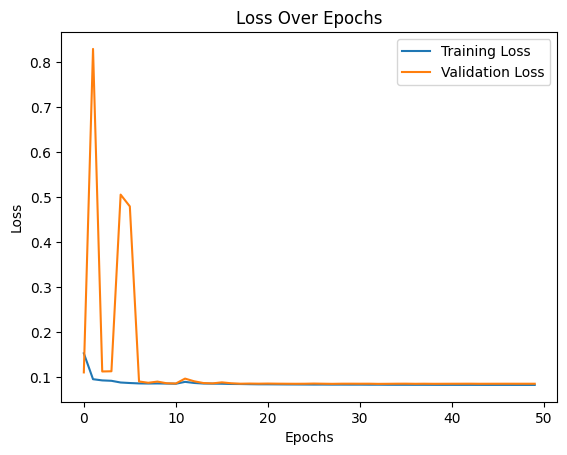

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

이제 전이학습일 시켜봅세다. transfer learning

In [20]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 64, 64, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 64, 64,    │        320 │ input_layer_8[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 32, 32,    │     18,496 │ max_pooling2d_8[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_6  │ (None, 16, 16,    │     36,928 │ max_pooling2d_9[… │
│ (Conv2DTranspose)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_transpose… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_4     │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (UpSampling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_7  │ (None, 32, 32,    │     18,464 │ up_sampling2d_4[… │
│ (Conv2DTranspose)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_transpose… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_5     │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (UpSampling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_9       │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_8  │ (None, 64, 64, 1) │        289 │ up_sampling2d_5[… │
│ (Conv2DTranspose)   │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 225,029 (879.02 KB)

 Trainable params: 74,881 (292.50 KB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 149,764 (585.02 KB)

In [57]:
from tensorflow.keras import layers, Model

encoder_input = model.input[0]
style_input = model.input[1]
encoded = model.get_layer("max_pooling2d_9").output  # 인코더 마지막 출력

# Style Embedding
style_embedding = layers.Dense(16 * 16 * 64, activation='relu')(style_input)
style_embedding = layers.Reshape((16, 16, 64))(style_embedding)

# Merge encoded and style embedding
merged = layers.Concatenate()([encoded, style_embedding])


x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(merged)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

# Fine-Tuning 모델 생성
fine_tuned_model = Model([encoder_input, style_input], decoded)
fine_tuned_model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [58]:
# 모델 입력 확인
print(fine_tuned_model.input)
# 모델 출력 확인
print(fine_tuned_model.output)

[<KerasTensor shape=(None, 64, 64, 1), dtype=float32, sparse=False, name=keras_tensor_46>, <KerasTensor shape=(None, 5), dtype=float32, sparse=False, name=keras_tensor_47>]
<KerasTensor shape=(None, 64, 64, 1), dtype=float32, sparse=False, name=keras_tensor_127>


In [59]:
fine_tuned_model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 64, 64, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 64, 64,    │        320 │ input_layer_8[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 32, 32,    │     18,496 │ max_pooling2d_8[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_9       │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 16384)     │     98,304 │ input_layer_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_8 (Reshape) │ (None, 16, 16,    │          0 │ dense_15[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_10      │ (None, 16, 16,    │          0 │ max_pooling2d_9[… │
│ (Concatenate)       │ 128)              │            │ reshape_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_30 │ (None, 16, 16,    │     73,792 │ concatenate_10[0… │
│ (Conv2DTranspose)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_20    │ (None, 32, 32,    │          0 │ conv2d_transpose… │
│ (UpSampling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_31 │ (None, 32, 32,    │     18,464 │ up_sampling2d_20… │
│ (Conv2DTranspose)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_21    │ (None, 64, 64,    │          0 │ conv2d_transpose… │
│ (UpSampling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_32 │ (None, 64, 64, 1) │        289 │ up_sampling2d_21… │
│ (Conv2DTranspose)   │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 210,049 (820.50 KB)

 Trainable params: 209,857 (819.75 KB)

 Non-trainable params: 192 (768.00 B)

In [60]:
import os
import cv2
import numpy as np

# 데이터 로드 함수
def load_handwritten_images(image_dir, target_size=(64, 64)):
    images = []
    labels = []
    file_names = sorted(os.listdir(image_dir))
    for file_name in file_names:
        if file_name.endswith(".jpg"):
            try:
                img_path = os.path.join(image_dir, file_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    print(f"Warning: Unable to read {img_path}")
                    continue
                img = cv2.resize(img, target_size) / 255.0  # 픽셀 정규화
                images.append(img)
                label = os.path.splitext(file_name)[0]  # splittext 오타 수정
                labels.append(label)
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")
    # NumPy 배열 변환 및 채널 차원 추가
    images_array = np.expand_dims(np.array(images), axis=-1)
    return images_array, labels

# 손글씨 데이터 경로
handwritten_path = "/Users/kimeunsur/2024winter/4주차/font_images/seungmin_hw"

# 손글씨 데이터 로드
X_handwritten, handwritten_labels = load_handwritten_images(handwritten_path)
style_label = 0
style_labels = np.full((len(X_handwritten),), style_label)
print(f"Handwritten data shape: {X_handwritten.shape}")
print(f"Number of labels: {len(handwritten_labels)}")


Handwritten data shape: (200, 64, 64, 1)
Number of labels: 200


In [61]:
# 원-핫 인코딩된 스타일 정보 생성 (단일 손글씨 스타일로 가정)
from tensorflow.keras.utils import to_categorical

style_label = 0  # 손글씨 스타일 번호
style_labels = np.full((len(X_handwritten),), style_label)
style_one_hot = to_categorical(style_labels, num_classes=1)  # 단일 클래스

# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_val, style_train, style_val = train_test_split(X_handwritten, style_labels, test_size=0.2, random_state=42)

X_train, X_val, style_train, style_val = train_test_split(
    X_handwritten, style_labels, test_size=0.2, random_state=42
)

# 입력 데이터 형태 확인
print(f"X_train: {X_train.shape}, X_val: {X_val.shape}")
print(f"style_train: {style_train.shape}, style_val: {style_val.shape}")


X_train: (160, 64, 64, 1), X_val: (40, 64, 64, 1)
style_train: (160,), style_val: (40,)


In [62]:
from tensorflow.keras.utils import to_categorical

# 스타일 레이블을 원-핫 인코딩
num_styles = 5  # 스타일 클래스 수
style_train_one_hot = to_categorical(style_train, num_classes=num_styles)
style_val_one_hot = to_categorical(style_val, num_classes=num_styles)

# 출력 확인
print("style_train_one_hot shape:", style_train_one_hot.shape)  # (160, 5)
print("style_val_one_hot shape:", style_val_one_hot.shape)      # (40, 5)

style_train_one_hot shape: (160, 5)
style_val_one_hot shape: (40, 5)


In [63]:
# 모델 학습
history = fine_tuned_model.fit(
    [X_train, style_train_one_hot],  # 입력: 이미지와 스타일
    X_train,                                 # 출력: 재구성된 이미지
    validation_data=([X_val, style_val_one_hot], X_val),
    epochs=50,
    batch_size=16
)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 304ms/step - loss: 0.1289 - mae: 0.2438 - val_loss: 0.0362 - val_mae: 0.0378
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 213ms/step - loss: 0.0375 - mae: 0.0395 - val_loss: 0.0362 - val_mae: 0.0375
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - loss: 0.0369 - mae: 0.0383 - val_loss: 0.0362 - val_mae: 0.0374
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - loss: 0.0374 - mae: 0.0388 - val_loss: 0.0362 - val_mae: 0.0374
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 212ms/step - loss: 0.0374 - mae: 0.0387 - val_loss: 0.0362 - val_mae: 0.0374
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step - loss: 0.0371 - mae: 0.0385 - val_loss: 0.0362 - val_mae: 0.0374
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - loss: 0.0369 - mae: 0.0383 - val_loss: 0.0362 - val_mae: 0.0374
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 210ms/step - loss: 0.0374 - mae: 0.0387 - val_loss: 0.0362 - val_mae: 0.0374
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step


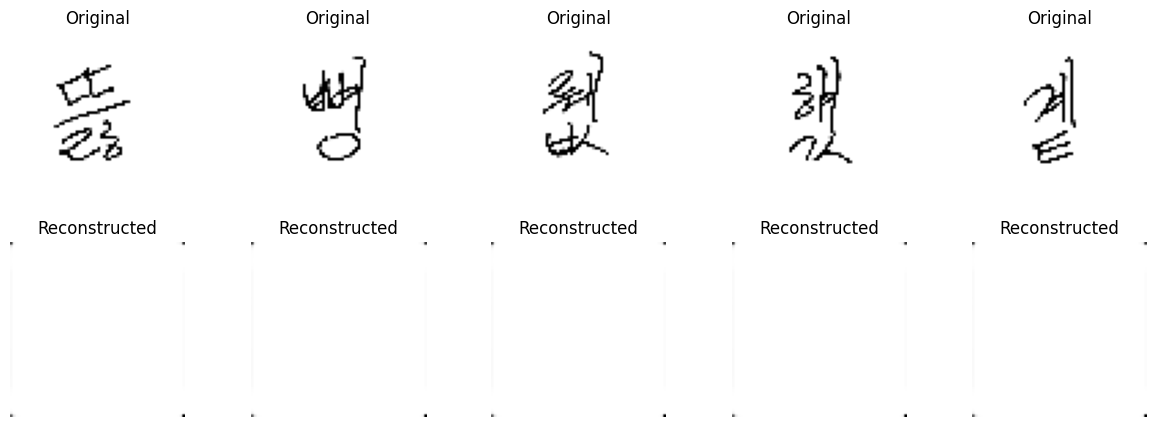

In [65]:
import matplotlib.pyplot as plt

# 검증 데이터에서 예측 결과 생성
reconstructed_images = fine_tuned_model.predict([X_val[:5], style_val_one_hot[:5]])

# 결과 시각화
n = 5  # 시각화할 샘플 수
plt.figure(figsize=(15, 5))
for i in range(n):
    # 원본 이미지
    plt.subplot(2, n, i + 1)
    plt.imshow(X_val[i].squeeze(), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    
    # 복원된 이미지
    plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].squeeze(), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()
